In [12]:
# Data Prep
import pandas as pd
import numpy as np

# Creating example data
data = {
    'age': [25, 34, 22, 45, 33, 35, 40, 60, 23, 31, 27, 50, 29, 28, 42, 37, 53, 24, 30, 26],
    'income': [50000, 60000, 35000, 80000, 55000, 58000, 62000, 90000, 40000, 52000, 47000, 75000, 49000, 51000, 70000, 60000, 85000, 43000, 54000, 48000],
    'vehicle_type_owned': ['sedan', 'suv', 'sedan', 'suv', 'sedan', 'sedan', 'suv', 'suv', 'sedan', 'sedan', 'sedan', 'suv', 'sedan', 'sedan', 'suv', 'suv', 'suv', 'sedan', 'sedan', 'sedan']
}

df = pd.DataFrame(data)


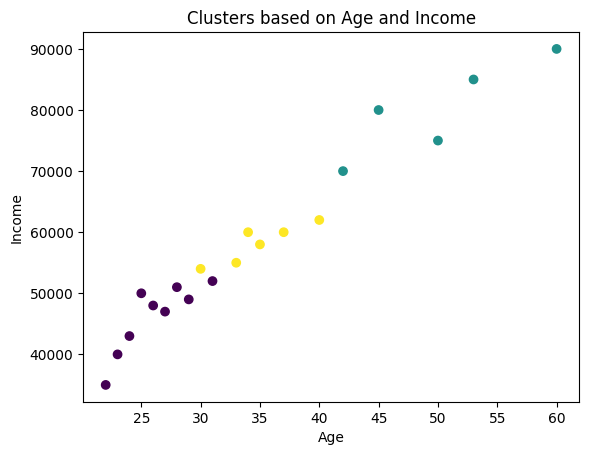

In [14]:
# Clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['age', 'income']])
df['cluster'] = kmeans.labels_

# Plotting the clusters
plt.scatter(df['age'], df['income'], c=df['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters based on Age and Income')
plt.show()

In [ ]:
def generate_random_data(vehicle_type):
    noise = True if np.random.randint(1,100) < 20 else False
    if vehicle_type == "car":
        if not noise:
            age = np.random.randint(40, 56)
            income = np.random.randint(60000, 80001)
        else:
            age = np.random.randint(30, 56)
            income = np.random.randint(55000, 85001)

    elif vehicle_type == "truck":
        if not noise:
            age = np.random.randint(45, 56)
            income = np.random.randint(70000, 90001)
        else:
            age = np.random.randint(30, 56)
            income = np.random.randint(55000, 85001)
    elif vehicle_type == "motorcycle":
        if not noise:
            age = np.random.randint(30, 51)
            income = np.random.randint(50000, 70001)
        else:
            age = np.random.randint(30, 56)
            income = np.random.randint(55000, 85001)
        
    else:
        raise ValueError("Invalid vehicle type")
    
    return age, income

# Set seed for reproducibility
np.random.seed(42)

# Generate 300 random data entries
data = []
vehicle_types = ["car", "truck", "motorcycle"]

for _ in range(1000):
    vehicle_type = np.random.choice(vehicle_types)
    age, income = generate_random_data(vehicle_type)
    data.append({"vehicle_type_owned": vehicle_type, "age": age, "income": income})


In [16]:
# Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encoding the target variable
le = LabelEncoder()
df['vehicle_type_encoded'] = le.fit_transform(df['vehicle_type_owned'])

# Splitting the data
X = df[['age', 'income']]
y = df['vehicle_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the model
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [18]:
# Evaluating the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



c:\Users\BIMAZZNXT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


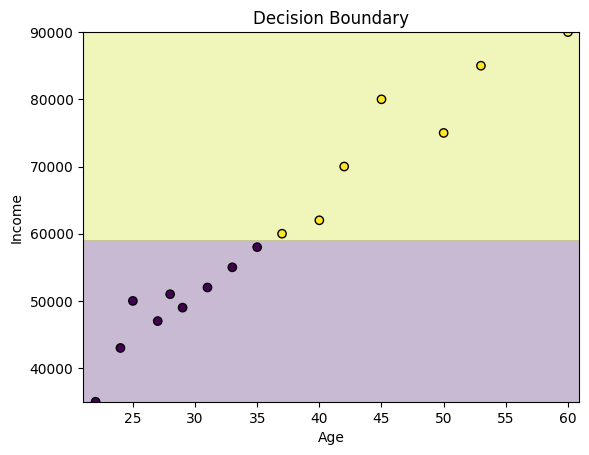

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

data = {
    'age': np.random.randint(20, 80, 100),
    'income': np.random.randint(30000, 150000, 100),
    'vehicle_type_owned': np.random.choice(['car', 'truck', 'motorcycle'], 100)
}

df = pd.DataFrame(data)

df_onehot = pd.get_dummies(df, columns=['vehicle_type_owned'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_onehot[['age', 'income']])

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)

X = df_onehot[['age', 'income']]
y = df_onehot[['vehicle_type_owned_car', 'vehicle_type_owned_motorcycle', 'vehicle_type_owned_truck']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

